In [1]:
import math

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

random_seed = 42

In [2]:
data = pd.read_csv("../data/featured/data.csv", sep=',')

Xdata = data.drop('teamA_win', axis=1)
ydata = data.teamA_win

In [3]:
Xtrain, Xval, ytrain, yval = train_test_split(Xdata, ydata, test_size=0.4, random_state=random_seed)

In [4]:
clfRF = RandomForestClassifier(n_estimators = 20, max_depth = 8, random_state = random_seed)
clfRF.fit(Xtrain, ytrain)

print('Accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, clfRF.predict(Xtrain))))
print('Accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, clfRF.predict(Xval))))

Accuracy score (train): 0.959703
Accuracy score (val): 0.643879


In [5]:
param_grid = {
    'n_estimators': range(28,31),
    'max_depth': range(2,5)
}

param_comb = ParameterGrid(param_grid)

val_metric = []
for params in param_comb:
    clfRF = RandomForestClassifier(**params, random_state = random_seed).fit(Xtrain, ytrain)
    val_metric.append(metrics.accuracy_score(yval, clfRF.predict(Xval)))
    
best_params = param_comb[np.argmax(val_metric)]
print(f"We found the best params {best_params} with validation acuraccy {max(val_metric):.4f}.")

We found the best params {'n_estimators': 28, 'max_depth': 2} with validation acuraccy 0.6820.


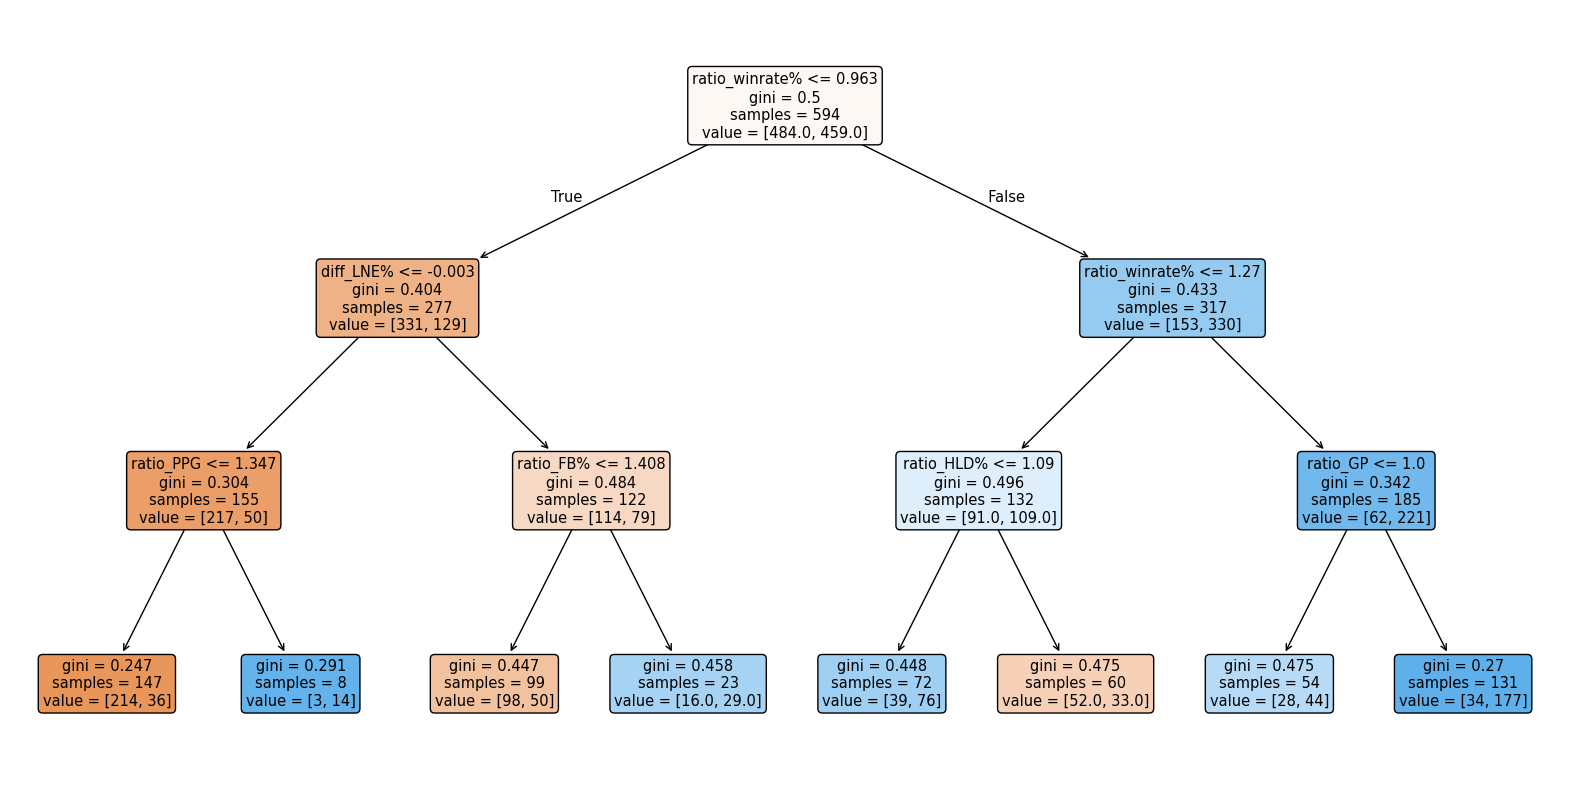

In [6]:
from sklearn import tree
import matplotlib.pyplot as plt

clfRF = RandomForestClassifier(n_estimators=30, max_depth=3, random_state = random_seed).fit(Xtrain, ytrain)

estimator = clfRF.estimators_[0]

plt.figure(figsize=(20, 10))
tree.plot_tree(
    estimator,
    feature_names=list(Xdata.columns),
    filled=True,
    rounded=True,
)
plt.show()
